<a href="https://colab.research.google.com/github/Carlosmagnobrusil/CarlosBrusil_projects/blob/main/Semana_8/Kmeans__heriarchy_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Agrupamiento Kmeans**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 24 de febrero de 2022 
*   Fechad de actualización: 24 de febrero de 2022
*   Descripción: Se realiza un ejercio donde se practican los modelos no supervisados de sgrupacion como lo son el Kmeans, agrupamiento jerarquico, DBSCAN 

In [2]:
from google.colab import drive
drive.mount('/content/drive') # uno my Drive al nuevo cuaderno

Mounted at /content/drive


In [41]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
from sklearn.metrics import silhouette_score # Herramientas de metricas que usare en todos mismodelos de agrupamiento 

In [4]:
cust =  '/content/drive/MyDrive/Coding_Dojo/Semana 8/Data/cust_seg.csv' #Nombro a la base
cust_df = pd.read_csv(cust) #le doy un nombre a la trama tener en cuenta que tipo dearchivo estoy leyendo
cust_df.head() #Observo que los datos hayan sido leidos de forma correcta

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [6]:
cust_df.drop(["Unnamed: 0"], axis = "columns", inplace = True ) # elimino mi columna sin nombre ya que es una copia del indice 

In [7]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [8]:
cust_df.columns= cust_df.columns.str.lower()#primero defino a todos los nombres de las columnas en letra minuscula

In [9]:
cust_df.columns = cust_df.columns.str.replace(' ', '_') #en esta linea realizo el cambio de los espacios del nombre de las columnas por 
#el '_' 

In [10]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      850 non-null    int64  
 1   age              850 non-null    int64  
 2   edu              850 non-null    int64  
 3   years_employed   850 non-null    int64  
 4   income           850 non-null    int64  
 5   card_debt        850 non-null    float64
 6   other_debt       850 non-null    float64
 7   defaulted        700 non-null    float64
 8   debtincomeratio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [11]:
list(cust_df.columns)

['customer_id',
 'age',
 'edu',
 'years_employed',
 'income',
 'card_debt',
 'other_debt',
 'defaulted',
 'debtincomeratio']

### Agrupamiento por clusters 

In [12]:
cust_df1 = cust_df[['age', 'edu']] #defino el data frame con las columnas que deseo trabajar 

In [13]:
cust_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     850 non-null    int64
 1   edu     850 non-null    int64
dtypes: int64(2)
memory usage: 13.4 KB


In [14]:
from sklearn.preprocessing import StandardScaler #herramienta de escalado de datos 

In [15]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cust_df1)#Creo mi base con datos escalados 

Text(0, 0.5, 'Educación del consumidor')

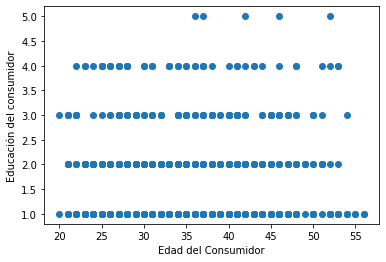

In [16]:
plt.scatter(cust_df['age'], cust_df['edu'])
plt.xlabel('Edad del Consumidor')
plt.ylabel('Educación del consumidor')

#### Definicion de numero de clusters 

In [17]:
from sklearn.cluster import KMeans #herarmienta de creacion de cluster 

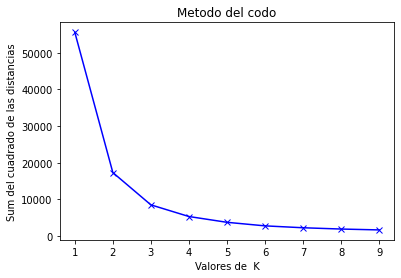

In [18]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(cust_df1)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Valores de  K") 
plt.ylabel("Sum del cuadrado de las distancias") 
plt.title("Metodo del codo")
plt.show() #este metodo nos permite crear una grafica que nos ayudara a identificar el nuemro de cluster necesarios para lo que buscamos 

In [19]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Cluster de consumidores')

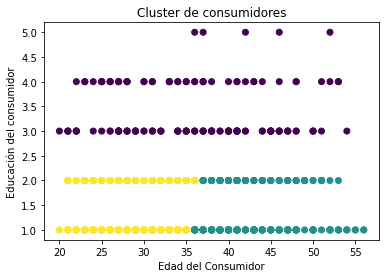

In [20]:
cust_df1['cluster'] = kmeans.labels_
# Visualiza los clusters
plt.scatter(cust_df1['age'], cust_df1['edu'], c = cust_df1['cluster'])
plt.xlabel('Edad del Consumidor')
plt.ylabel('Educación del consumidor')
plt.title('Cluster de consumidores')

In [21]:
cust_df2 = cust_df[['age', 'income']] #defino el data frame con las columnas que deseo trabajar 
scaler = StandardScaler()
scaled_df2 = scaler.fit_transform(cust_df1)#Creo mi base con datos escalados 

Text(0, 0.5, 'Ingreso del consumidor')

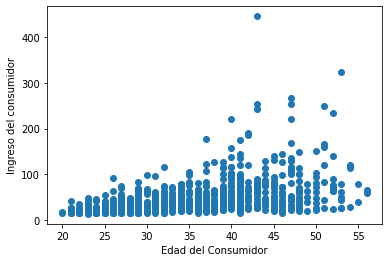

In [22]:
plt.scatter(cust_df['age'], cust_df['income'])
plt.xlabel('Edad del Consumidor')
plt.ylabel('Ingreso del consumidor')

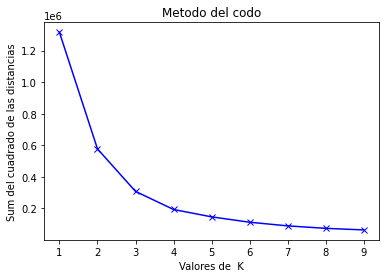

In [23]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(cust_df2)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Valores de  K") 
plt.ylabel("Sum del cuadrado de las distancias") 
plt.title("Metodo del codo")
plt.show() #este metodo nos permite crear una grafica que nos ayudara a identificar el nuemro de cluster necesarios para lo que buscamos 

In [24]:
kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(scaled_df)

KMeans(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Cluster de consumidores')

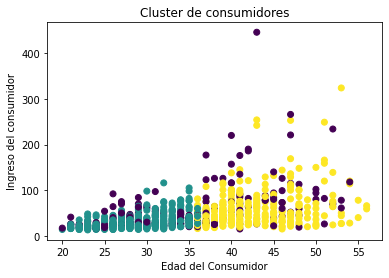

In [25]:
cust_df2['cluster'] = kmeans1.labels_
# Visualiza los clusters
plt.scatter(cust_df2['age'], cust_df2['income'], c = cust_df2['cluster'])
plt.xlabel('Edad del Consumidor')
plt.ylabel('Ingreso del consumidor')
plt.title('Cluster de consumidores')

##### De los dos grupos realizados podemos observar que las personas que superan los 35 años tienen maypres ingresos, ademas podemos observar que on existe una tendencia entre la edad y los estudios alcanzados 

In [44]:
round(silhouette_score(scaled_df, kmeans1.labels_),2)

0.26

###  Agrupamiento Jerarquico 

In [27]:
from sklearn.cluster import  AgglomerativeClustering #herarmienta de creacion de cluster jerarquico 

In [31]:
cust_df3 = cust_df[['age', 'income']] #defino el data frame con las columnas que deseo trabajar 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cust_df3)#Creo mi base con datos escalados 

In [32]:
hc = AgglomerativeClustering(n_clusters = 3) #realizo la primera instancia del modelo 
hc.fit(scaled_df)

AgglomerativeClustering(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Cluster de consumidores')

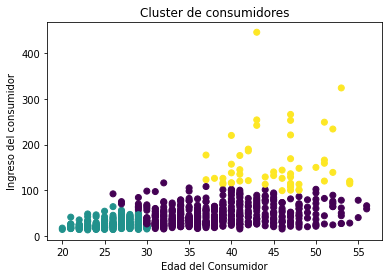

In [33]:
cust_df2['cluster'] = hc.labels_
# Visualiza los clusters
plt.scatter(cust_df2['age'], cust_df2['income'], c = cust_df2['cluster'])
plt.xlabel('Edad del Consumidor')
plt.ylabel('Ingreso del consumidor')
plt.title('Cluster de consumidores')

In [46]:
round(silhouette_score(scaled_df, hc.labels_),2)

0.38

### DBSCAN 

In [36]:
from sklearn.cluster import DBSCAN # Instalo herramienta para generar modelo de agrupacion Dbscan

In [37]:
cust_df4 = cust_df[['age', 'income']] #defino el data frame con las columnas que deseo trabajar 
scaler = StandardScaler()
scaled_df4 = scaler.fit_transform(cust_df4)#Creo mi base con datos escalados 

In [38]:
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Cluster de consumidores')

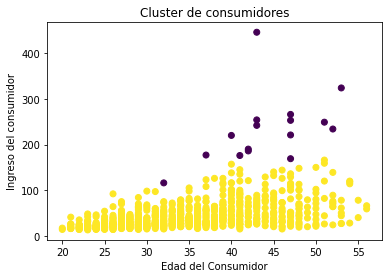

In [39]:
cust_df2['cluster'] = dbs.labels_
# Visualiza los clusters
plt.scatter(cust_df2['age'], cust_df2['income'], c = cust_df2['cluster'])
plt.xlabel('Edad del Consumidor')
plt.ylabel('Ingreso del consumidor')
plt.title('Cluster de consumidores')

In [47]:
round(silhouette_score(scaled_df4, dbs.labels_),2)

0.7

#### El mejor modelo siguiendo con la metrica de la silueta es el modelo DBSCAN, esto unicamente para las varables escogidas relizando diferentes agrupamiento deberiamos observar de mejor manera 